In [ ]:
from utils import map_vis_without_lanelet
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np

In [74]:
def rotate_around_center(pts, center, yaw):
    return np.dot(pts - center, np.array([[np.cos(yaw), np.sin(yaw)], [-np.sin(yaw), np.cos(yaw)]])) + center


def polygon_xy_from_motionstate(ms, width, length):
    x = ms['x']
    y = ms['y']
    lowleft = (x - length / 2.,y - width / 2.)
    lowright = (x + length / 2., y - width / 2.)
    upright = (x + length / 2., y + width / 2.)
    upleft = (x - length / 2., y + width / 2.)
    return rotate_around_center(np.array([lowleft, lowright, upright, upleft]), np.array([x, y]), yaw=ms['psi_rad'])


def update_objects_plot(timestamp, track, axes):
    ms = track['motion_states'][timestamp]
    width = 2
    length = 5
    rect = matplotlib.patches.Polygon(polygon_xy_from_motionstate(ms, width, length), closed=True,
                                      zorder=20, alpha=0.5, edgecolor='black', facecolor='green')
    axes.add_patch(rect)

In [75]:
work_dir = 'D:/Dev/UCB task/'
scene = 'FT'
ref_path_info_path = work_dir + 'pickle/{}/ref_path_xy_{}.pkl'.format(scene, scene)
pickle_file = open(ref_path_info_path, 'rb')
ref_paths = pickle.load(pickle_file)
pickle_file.close()
pickle_file = open(work_dir + 'pickle/{}/track_path_frenet_{}.pkl'.format(scene, scene), 'rb')
csv_data = pickle.load(pickle_file)
pickle_file.close()
pickle_file = open(work_dir + 'pickle/{}/edges_{}_001.pkl'.format(scene, scene), 'rb')
edge_data = pickle.load(pickle_file)
pickle_file.close()
csv_sample = csv_data['001']
car_sample = edge_data[11]
print(car_sample.keys())
sts = 19100
case = car_sample[sts]
print(case['agents'])
xps = []
yps = []

dict_keys([19100, 19200, 20200, 20300, 20400, 20500, 20600, 20700, 20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600])
[11, 10]


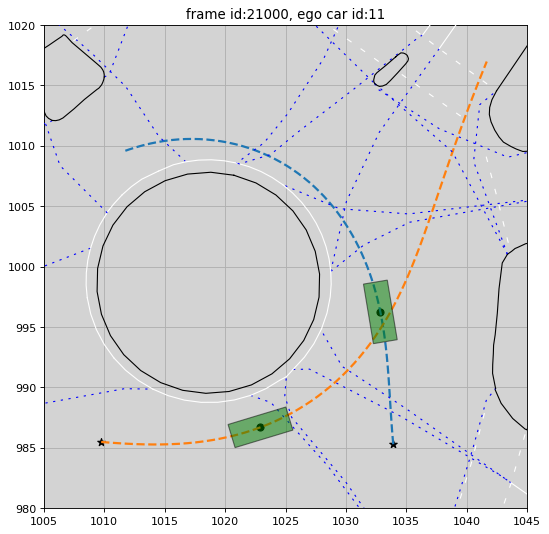

In [76]:
map_dir = 'D:/Downloads/INTERACTION-Dataset-DR-v1_0/maps/'
map_name = "DR_USA_Roundabout_{}.osm".format(scene)
map_file = map_dir + map_name
fig, axes = plt.subplots(1, 1, figsize=(8, 8), dpi=80)
plt.grid()
map_vis_without_lanelet.draw_map_without_lanelet(map_file, axes, 0, 0)
for car_id in case['agents']:
    car = csv_sample[car_id]
    car_path = car['ref path']
    ref_xy = ref_paths[car_path]
    xy = case['xy'][car_id]
    xp = []
    yp = []
    for p in xy:
        if p != 'NaN':
            x = p[0]
            y = p[1]
            xp.append(x)
            yp.append(y)
    plt.plot(xp, yp, linewidth=2,linestyle='dashed')
    plt.scatter(xp[0], yp[0], c='black', marker='*', s=50)
    plt.xlim(1005, 1045)
    plt.ylim(980, 1020)
    update_objects_plot(sts+19*100,car,axes)
    plt.scatter(xp[19], yp[19], c='black',s=40)
plt.title('frame id:{}, ego car id:{}'.format(sts+19*100, 11))
plt.show()